In [ ]:
!python --version


Python 3.11.12


In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class CelebADataset(Dataset):
  def __init__(self, root_dir, transform= None):
    """
    Args:
      root_dir (string): Directory with all the images.
      transform (callable, optional): Optional transform to be applied on a sample.
    """
    self.root_dir = root_dir
    self.transform = transform

    # get all image file paths from the directory
    self.image_paths = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if f.endswith('.jpg')]

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    # load image
    image_path = self.image_paths[idx]
    image = Image.open(image_path).convert('RGB')

    # apply the transform if provided
    if self.transform:
      image = self.transform(image)

    return image


In [ ]:
transform = transforms.Compose([
    transforms.Resize(64),               #Resize images to 64x64
    transforms.CenterCrop(64),           # crop center to 64x64
    transforms.ToTensor(),               # Convert images to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))   # Normalize to [-1, 1]
])

# load celeb dataset

dataset_path = "/content/drive/MyDrive/dataset_GAN"
dataset = CelebADataset(root_dir=dataset_path, transform=transform)

# creating dataloader
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

#check how many images are loaded

print(f"Total number of images loaded: {len(dataset)} ")



Total number of images loaded: 8447 


In [ ]:
# now writing code for generator
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np


class Generator(nn.Module):
  def __init__(self,z_dim = 100, img_channels = 3):
    super(Generator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(z_dim, 256),
        nn.ReLU(True),
        nn.Linear(256, 512),
        nn.ReLU(True),
        nn.Linear(512, 1024),
        nn.ReLU(True),
        nn.Linear(1024, img_channels * 64 * 64),
        nn.Tanh()
    )

  def forward(self,z):
    img = self.model(z)
    img = img.view(img.size(0),3, 64, 64) #reshape to image format
    return img



In [ ]:
class Discriminator(nn.Module):
  def __init__(self, img_channels = 3):
    super(Discriminator, self).__init__()
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(img_channels * 64 * 64, 1024),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Linear(1024, 512),
        nn.LeakyReLU(0.2, inplace =True),
        nn.Linear(512,256),
        nn.LeakyReLU(0.2,inplace = True),
        nn.Linear(256, 1),
        nn.Sigmoid()
    )

  def forward(self,img):
    return self.model(img)


In [ ]:
# so now both discriminator and genrator are made we define parameters
adversarial_loss = nn.BCELoss()
generator = Generator(z_dim=100)
discriminator = Discriminator()
optimizer_G = optim.Adam(generator.parameters(), lr = 0.0002, betas = (0.5,0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr = 0.0002, betas = (0.5, 0.999))
# defining device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

generator = generator.to(device)
discriminator = discriminator.to(device)
#adversarial_loss = adversarial_loss.to(device)


[Epoch 0/10] [Batch 0/66] [D loss: 0.3842718005180359] [G loss: 0.8100782632827759]
[Epoch 0/10] [Batch 50/66] [D loss: 0.33990421891212463] [G loss: 1.3514758348464966]


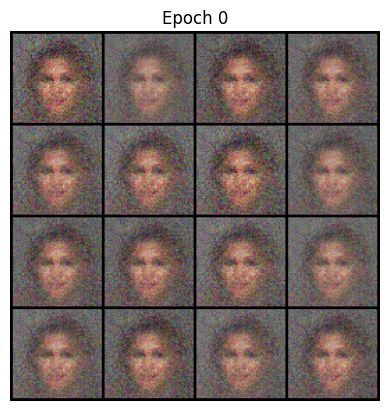

[Epoch 1/10] [Batch 0/66] [D loss: 0.31171372532844543] [G loss: 1.9730932712554932]
[Epoch 1/10] [Batch 50/66] [D loss: 0.13793593645095825] [G loss: 1.6167092323303223]


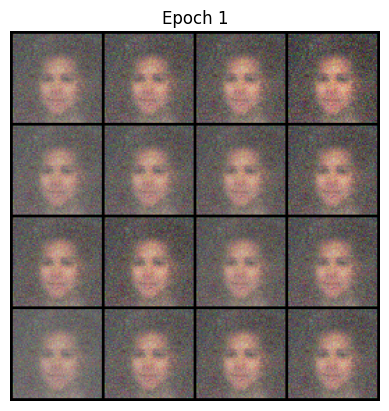

[Epoch 2/10] [Batch 0/66] [D loss: 0.1237822026014328] [G loss: 2.179837226867676]
[Epoch 2/10] [Batch 50/66] [D loss: 0.04835528880357742] [G loss: 2.871094226837158]


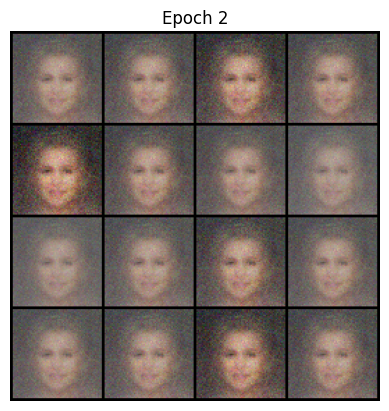

[Epoch 3/10] [Batch 0/66] [D loss: 0.17903557419776917] [G loss: 2.198838710784912]
[Epoch 3/10] [Batch 50/66] [D loss: 0.07896596938371658] [G loss: 2.798281192779541]


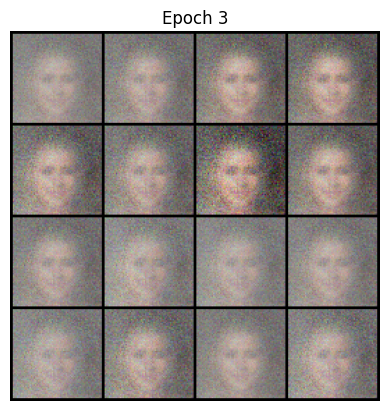

[Epoch 4/10] [Batch 0/66] [D loss: 0.21861480176448822] [G loss: 2.41463041305542]
[Epoch 4/10] [Batch 50/66] [D loss: 0.28495925664901733] [G loss: 1.7471314668655396]


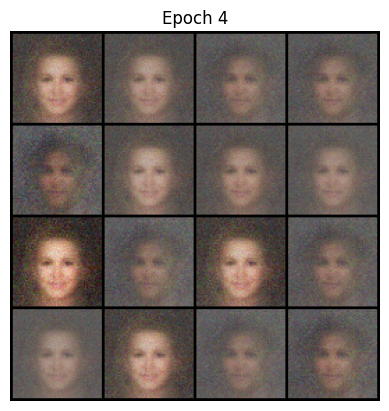

[Epoch 5/10] [Batch 0/66] [D loss: 0.19616225361824036] [G loss: 1.823634386062622]
[Epoch 5/10] [Batch 50/66] [D loss: 0.1004367470741272] [G loss: 2.8941409587860107]


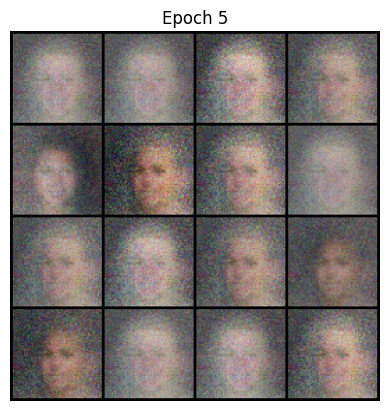

[Epoch 6/10] [Batch 0/66] [D loss: 0.09448219835758209] [G loss: 4.383475303649902]
[Epoch 6/10] [Batch 50/66] [D loss: 0.4000791311264038] [G loss: 2.765908718109131]


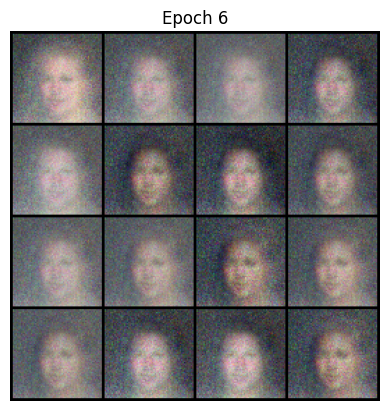

[Epoch 7/10] [Batch 0/66] [D loss: 0.11793246120214462] [G loss: 2.631889820098877]
[Epoch 7/10] [Batch 50/66] [D loss: 0.17455017566680908] [G loss: 1.9430967569351196]


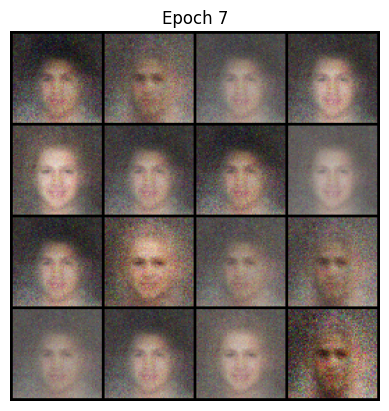

[Epoch 8/10] [Batch 0/66] [D loss: 0.19552850723266602] [G loss: 3.3196706771850586]
[Epoch 8/10] [Batch 50/66] [D loss: 0.6334373950958252] [G loss: 3.08843994140625]


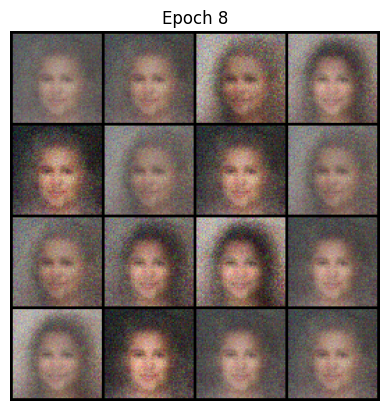

[Epoch 9/10] [Batch 0/66] [D loss: 0.23901408910751343] [G loss: 1.4919861555099487]
[Epoch 9/10] [Batch 50/66] [D loss: 0.21927760541439056] [G loss: 2.6090352535247803]


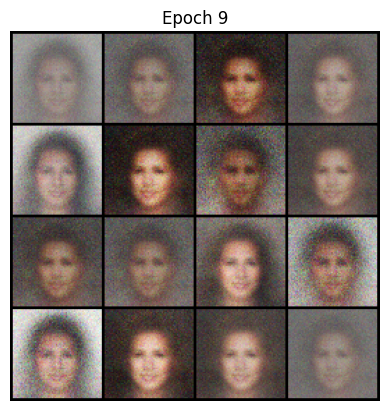

In [ ]:
# Training loop
def train(generator, discriminator, dataloader, epochs=5):
    for epoch in range(epochs):
        for i, imgs in enumerate(dataloader):
            real_imgs = imgs.to(device)
            batch_size = real_imgs.size(0)
            valid = torch.ones(batch_size, 1).to(device)
            fake = torch.zeros(batch_size, 1).to(device)

            # Train Discriminator
            optimizer_D.zero_grad()
            real_loss = adversarial_loss(discriminator(real_imgs), valid)
            fake_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device)).detach()), fake)
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            g_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device))), valid)
            g_loss.backward()
            optimizer_G.step()

            if i % 50 == 0:
                print(f"[Epoch {epoch}/{epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

        # Optionally, save generated images at each epoch
        save_generated_images(generator, epoch, device)

import torchvision
def save_generated_images(generator, epoch, device, num_images=16):
    z = torch.randn(num_images, 100).to(device)
    generated_imgs = generator(z).detach().cpu()
    grid = torchvision.utils.make_grid(generated_imgs, nrow=4, normalize=True)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.title(f"Epoch {epoch}")
    plt.axis('off')
    plt.show()

# Start training
train(generator, discriminator, dataloader, epochs=10)